In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-5ddb504f-f10b-ffd5-20e5-0ef770ff546d)


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-5ddb504f-f10b-ffd5-20e5-0ef770ff546d)


In [ ]:
!wget https://raw.githubusercontent.com/riya0920/DeepLearning_TensorFlow/main/helper_functions.py

--2023-04-16 15:51:22--  https://raw.githubusercontent.com/riya0920/DeepLearning_TensorFlow/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11134 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.87K  --.-KB/s    in 0s      

2023-04-16 15:51:22 (71.1 MB/s) - ‘helper_functions.py’ saved [11134/11134]



In [ ]:
from helper_functions import unzip_data,walk_through_dir,create_tensorboard_callback,plot_loss_curves

In [ ]:
#Text Dataset!!!
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-04-16 15:51:29--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2023-04-16 15:51:29 (136 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
unzip_data("nlp_getting_started.zip")

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df["text"][20]

'this is ridiculous....'

In [ ]:


train_df_shuffled = train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(train_df),len(test_df)

(7613, 3263)

In [ ]:
import random
random_index = random.randint(0,len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
   _,text,target = row
   print(f"Text: {text} ", f"{target}\n------------------------------------------------------------------------------")



Text: Buildings are on fire and they have time for a business meeting #TheStrain  1
------------------------------------------------------------------------------
Text: Reality Training: Train falls off elevated tracks during windstorm http://t.co/wAL4FrTfKa #fire #ems  1
------------------------------------------------------------------------------
Text: Hollywood Movie About Trapped Miners Released in Chile: 'The 33' Hollywood movie about trapped miners starring... http://t.co/0f8XA4Ih1U  1
------------------------------------------------------------------------------
Text: NOTHING YOU MIDGET I WILL DEMOLISH YOU SHOW SOME RESPECT  0
------------------------------------------------------------------------------
Text: #hot  Reddit's new content policy goes into effect many horrible subreddits banned or quarantined http://t.co/nGKrZPza45 #prebreak #best  1
------------------------------------------------------------------------------


In [ ]:
#Split data into training and validation datasets
from sklearn.model_selection import train_test_split
(train_sentences,val_sentences,train_labels,val_labels) = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                           train_df_shuffled["target"].to_numpy(),
                                                                           test_size = 0.1,
                                                                           random_state = 42)

In [ ]:
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
# text_vectorizer = TextVectorization(max_tokens = 10000000,
#                                     standardize = "lower_and_strip_punctuation",
#                                     split = "whitespace",
#                                     ngrams = None,
#                                     output_mode = "int",
#                                     output_sequence_length = None,
#                                     pad_to_max_tokens = True)

In [ ]:
max_vocab_length = 10000
max_length = 15
text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = "int",
                                    output_sequence_length = max_length)

In [ ]:
#Fit the text vectorizer to the training data
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "There is a flood in my street and I think we might need help"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 232,   4,  13, 698,   7,   8, 125,  46, 843, 162,
        148,   0]])>

In [ ]:
random_sentence = random.choice(train_sentences)
random_sentence, text_vectorizer([random_sentence])

("I just nearly crashed my car typing 'Paul Rudd attacked by flying ants' into notes on my phone.",
 <tf.Tensor: shape=(1, 15), dtype=int64, numpy=
 array([[   8,   29,  841,  402,   13,  127, 7270, 1496, 4705,  323,   18,
         3838,    1,   66,    1]])>)

In [ ]:
#Get the unique vocabulary

words_in_vocab = text_vectorizer.get_vocabulary()
words_in_vocab[:5], words_in_vocab[-5:],len(words_in_vocab)

(['', '[UNK]', 'the', 'a', 'in'],
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1'],
 10000)

In [ ]:
#Creating an embedding layer
from tensorflow.keras import layers

In [ ]:
embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             input_length = max_length)
embedding


In [ ]:
random_sentence = random.choice(train_sentences)
random_sentence, embedding(text_vectorizer([random_sentence]))

('Aircraft debris confirmed to be from MH370 - Nation | The Star Online http://t.co/heS0bPU60Y',
 <tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.00011241, -0.02738859, -0.03323274, ..., -0.00989277,
          -0.00212236, -0.01378909],
         [-0.04541751, -0.02559455,  0.04194185, ..., -0.03134557,
          -0.0430131 , -0.00046043],
         [ 0.01334577,  0.02492261, -0.031675  , ...,  0.02079935,
          -0.02646719,  0.02059499],
         ...,
         [ 0.0063464 ,  0.04486695,  0.00936101, ..., -0.03405029,
           0.01582015,  0.00297978],
         [ 0.0063464 ,  0.04486695,  0.00936101, ..., -0.03405029,
           0.01582015,  0.00297978],
         [ 0.0063464 ,  0.04486695,  0.00936101, ..., -0.03405029,
           0.01582015,  0.00297978]]], dtype=float32)>)

In [ ]:
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed[0][0],sample_embed.shape

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.00011241, -0.02738859, -0.03323274,  0.03048522,  0.03102535,
         0.02179209,  0.02514932, -0.02533848,  0.03802493,  0.02849214,
         0.02982396,  0.0048977 ,  0.01170636, -0.04176474,  0.04537443,
        -0.00210648,  0.01504843,  0.02604583, -0.01848248, -0.02265939,
         0.00571582,  0.03235496,  0.03088233, -0.04283325,  0.02627519,
        -0.02065049, -0.03067788, -0.02764278, -0.00601606,  0.04563401,
         0.01330019,  0.04925359, -0.03599297,  0.03677919,  0.02230341,
        -0.03723679, -0.02684766, -0.03079091, -0.02442716, -0.02211863,
         0.04116369,  0.03883929,  0.03588334,  0.01303921,  0.02943141,
         0.04031417, -0.03463582, -0.00547589,  0.01906408, -0.02881595,
         0.04973197, -0.00942317, -0.0141031 ,  0.01764015,  0.02076497,
        -0.00688299, -0.01418928, -0.00814497,  0.0261227 , -0.01819543,
         0.04798832,  0.01925537, -0.04616404,  0.01577565,  0.0009114 ,
  

BASELINE MODEL (NON-DL)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([("Tfidf",TfidfVectorizer()),
                     ("clf",MultinomialNB())])

model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
base_line_score = model_0.score(val_sentences,val_labels)
base_line_score*100

79.26509186351706

In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10],val_labels[:10]

(array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0]), array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0]))

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calc_results(y_true,y_preds):
  model_accuracy = accuracy_score(y_true, y_preds) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_preds, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results


In [ ]:
baseline_results = calc_results(y_true = val_labels,
             y_preds = baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
print(inputs.shape)
x = text_vectorizer(inputs)
print(x.shape)
x = embedding(x)
print(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
Model_1 = tf.keras.Model(inputs,outputs)

(None, 1)
(None, 15)
KerasTensor(type_spec=TensorSpec(shape=(None, 15, 128), dtype=tf.float32, name=None), name='embedding/embedding_lookup/Identity_1:0', description="created by layer 'embedding'")


In [ ]:
Model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-train

In [ ]:
import numpy as np
Model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
# train_lables = tf.reshape(train_labels, (-1, 15, 1))
Model_1.fit(train_sentences,
            train_labels,
            epochs = 5,
            callbacks = [create_tensorboard_callback("Models","Model_1")])
# train_sentences.shape,train_labels.shape
# val_sentences.shape,val_labels.shape

Saving TensorBoard log files to: Models/Model_1/20230416-155135
Epoch 1/5
215/215 [==============================] - 20s 68ms/step - loss: 0.6101 - accuracy: 0.6866
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4407 - accuracy: 0.8184
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3467 - accuracy: 0.8616
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2835 - accuracy: 0.8918
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2380 - accuracy: 0.9113


In [ ]:
results_1 = Model_1.evaluate(val_sentences,val_labels)
results_1

24/24 [==============================] - 0s 5ms/step - loss: 0.4803 - accuracy: 0.7848


[0.480278342962265, 0.7847769260406494]

In [ ]:
Model1_preds = Model_1.predict(val_sentences)
Model1_preds[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.33733627],
       [0.78901625],
       [0.9976566 ],
       [0.14298959],
       [0.10826572],
       [0.9383604 ],
       [0.9061017 ],
       [0.9924677 ],
       [0.9653193 ],
       [0.31449142]], dtype=float32)

In [ ]:
Model1_preds = tf.squeeze(tf.round(Model1_preds))
Model1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
Model_1_results = calc_results(y_true = val_labels, y_preds = Model1_preds)
Model_1_results

{'accuracy': 78.4776902887139,
 'precision': 0.7887661817696516,
 'recall': 0.7847769028871391,
 'f1': 0.7820385831619191}

In [ ]:

#Embedding in a bit detail!!!!
embed_weights = Model_1.get_layer("embedding").get_weights()[0]
embed_weights,embed_weights.shape

(array([[ 0.01957339,  0.05904485, -0.00347561, ..., -0.02497051,
          0.02981929,  0.01675187],
        [-0.01643225,  0.0044572 , -0.05226682, ..., -0.01035947,
         -0.02642438,  0.03902734],
        [-0.01827915,  0.04525693,  0.00397969, ..., -0.00481581,
          0.06425793,  0.02741336],
        ...,
        [ 0.03629899, -0.0002824 ,  0.02598995, ...,  0.01373183,
         -0.01841041,  0.01338807],
        [ 0.01187199, -0.01348058, -0.03912297, ...,  0.07629829,
          0.07347436, -0.00213641],
        [ 0.07376035,  0.0529681 , -0.03598214, ...,  0.11531659,
          0.02633946,  0.03404792]], dtype=float32),
 (10000, 128))

In [ ]:
# # Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()


In [ ]:

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# First RNN
LSTM: Long Short Term Memory

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64,return_sequences = True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
Model_2 = tf.keras.Model(inputs,outputs)

In [ ]:
Model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                           

In [ ]:
Model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
History_2 = Model_2.fit(train_sentences,
                        train_labels,
                        epochs = 5,
                        validation_data = (val_sentences,val_labels),
                        callbacks = [create_tensorboard_callback("Models","Model_2")])

Saving TensorBoard log files to: Models/Model_2/20230416-155220
Epoch 1/5
215/215 [==============================] - 18s 59ms/step - loss: 0.2201 - accuracy: 0.9247 - val_loss: 0.5345 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1571 - accuracy: 0.9412 - val_loss: 0.6121 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.1272 - accuracy: 0.9510 - val_loss: 0.8195 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1056 - accuracy: 0.9609 - val_loss: 0.9645 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0853 - accuracy: 0.9670 - val_loss: 1.0362 - val_accuracy: 0.7664


In [ ]:
model_2_pred_probs = Model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[3.9809993e-03],
       [5.5333972e-01],
       [9.9986136e-01],
       [2.3568703e-02],
       [1.5586402e-04],
       [9.9807429e-01],
       [9.3277812e-01],
       [9.9992490e-01],
       [9.9986124e-01],
       [5.4378974e-01]], dtype=float32)

In [ ]:
model_2_pred_probs = (tf.squeeze(tf.round(model_2_pred_probs)))
model_2_pred_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
Model_2_results = calc_results(y_true = val_labels,
                               y_preds = model_2_pred_probs)
Model_2_results

{'accuracy': 76.64041994750657,
 'precision': 0.7672473559947978,
 'recall': 0.7664041994750657,
 'f1': 0.7646647680054942}

GRU

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,),dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.GRU(64,return_sequences = True)(x)
x = layers.GlobalAveragePooling1D()(x)
print(x.shape)
x = layers.Dense(64,activation = "relu")(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
Model_3 = tf.keras.Model(inputs,outputs)

(None, 15, 128)
(None, 64)


In [ ]:
Model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
History_3 = Model_3.fit(train_sentences,
                        train_labels,
                        epochs = 5,
                        validation_data = (val_sentences,val_labels),
                        callbacks = [create_tensorboard_callback("Models","Model_3")])

Saving TensorBoard log files to: Models/Model_3/20230416-155306
Epoch 1/5
215/215 [==============================] - 16s 60ms/step - loss: 0.1639 - accuracy: 0.9526 - val_loss: 0.7880 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0854 - accuracy: 0.9673 - val_loss: 1.0053 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0681 - accuracy: 0.9714 - val_loss: 1.3852 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0577 - accuracy: 0.9727 - val_loss: 1.2681 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0493 - accuracy: 0.9764 - val_loss: 1.6181 - val_accuracy: 0.7756


In [ ]:
result_3 = Model_3.evaluate(val_sentences,val_labels)
result_3

24/24 [==============================] - 0s 4ms/step - loss: 1.6181 - accuracy: 0.7756


[1.618065357208252, 0.7755905389785767]

In [ ]:
model3_preds = Model_3.predict(val_sentences)
model3_preds = tf.squeeze(tf.round(model3_preds))
model3_preds[:10]

24/24 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
Model_3_results = calc_results(y_true = val_labels,
             y_preds = model3_preds)

Bidirectional

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.GlobalAveragePooling1D()(x)
x = layers.Bidirectional(layers.LSTM(64,return_sequences = True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
Model_4 = tf.keras.Model(inputs,outputs)

In [ ]:
Model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
History_4 = Model_4.fit(train_sentences,
                        train_labels,
                        epochs = 5,
                        validation_data = (val_sentences,val_labels),
                        callbacks = [create_tensorboard_callback("Models","Model_4")])

Saving TensorBoard log files to: Models/Model_4/20230416-155351
Epoch 1/5
215/215 [==============================] - 22s 63ms/step - loss: 0.1088 - accuracy: 0.9609 - val_loss: 0.9359 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0569 - accuracy: 0.9755 - val_loss: 1.2826 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0481 - accuracy: 0.9769 - val_loss: 1.2494 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0440 - accuracy: 0.9775 - val_loss: 1.1952 - val_accuracy: 0.7454
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0458 - accuracy: 0.9788 - val_loss: 1.6222 - val_accuracy: 0.7546


In [ ]:
result_4 = Model_4.evaluate(val_sentences,val_labels)
result_4

24/24 [==============================] - 0s 6ms/step - loss: 1.6222 - accuracy: 0.7546


[1.6221747398376465, 0.7545931935310364]

In [ ]:
Model4_preds = Model_4.predict(val_sentences)
Model4_preds = tf.squeeze(tf.round(Model4_preds))
Model4_preds[:10]

24/24 [==============================] - 1s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
Model_4_results = calc_results(y_true = val_labels,
             y_preds = Model4_preds)
Model_4_results

{'accuracy': 75.45931758530183,
 'precision': 0.7541868955719352,
 'recall': 0.7545931758530183,
 'f1': 0.7538108030960206}

Model:5 Solving the NLP problem with the Conv layers

In [ ]:
embedding_test = embedding(text_vectorizer(["Jai Shri Ram"]))
conv_1D = layers.Conv1D(filters = 64,
                        kernel_size = 5,
                        padding = "same",
                        activation = "relu")
conv1d = conv_1D(embedding_test)
max_pool = layers.GlobalAveragePooling1D()
max_pool1d = max_pool(conv1d)
embedding_test.shape,conv1d.shape,max_pool1d.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 64]), TensorShape([1, 64]))

In [ ]:
inputs = layers.Input(shape = (1,), dtype = tf.string)
x = embedding(text_vectorizer(inputs))
x = layers.Conv1D(filters = 64,
                  kernel_size = 5,
                  activation = "relu",
                  padding = "valid")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1,activation = "sigmoid")(x)
Model_5 = tf.keras.Model(inputs,outputs)

Model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
Model_5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_6 (Dense)             (None, 1)                 65  

In [ ]:
History_5 = Model_5.fit(train_sentences,
                        train_labels,
                        epochs = 5,
                        validation_data = (val_sentences,val_labels),
                        callbacks = [create_tensorboard_callback("Models","Model_5")])

Saving TensorBoard log files to: Models/Model_5/20230416-155444
Epoch 1/5
215/215 [==============================] - 15s 56ms/step - loss: 0.1281 - accuracy: 0.9588 - val_loss: 0.8884 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0763 - accuracy: 0.9715 - val_loss: 1.0502 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0621 - accuracy: 0.9759 - val_loss: 1.0972 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0558 - accuracy: 0.9780 - val_loss: 1.1648 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0509 - accuracy: 0.9785 - val_loss: 1.2425 - val_accuracy: 0.7638


In [ ]:
Model_5_pred_probs = Model_5.predict(val_sentences)
Model_5_pred_probs = tf.squeeze(tf.round(Model_5_pred_probs))
Model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
Model_5_results = calc_results(y_true = val_labels,
             y_preds = Model_5_pred_probs)

MODEL:6 TRANSFER LEARNING USING THE USE

In [ ]:
import tensorflow_hub as hub
sentence_encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                  input_shape=[],
                                  trainable = False,
                                  dtype = tf.string)
Model_6 = tf.keras.Sequential([
    sentence_encoder,
    # tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [ ]:
Model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
Model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
History_6 = Model_6.fit(train_sentences,
                        train_labels,
                        epochs = 5,
                        validation_data = (val_sentences,val_labels),
                        callbacks = [create_tensorboard_callback("Models","Model_6")])

Saving TensorBoard log files to: Models/Model_6/20230416-155543
Epoch 1/5
215/215 [==============================] - 8s 15ms/step - loss: 0.5029 - accuracy: 0.7844 - val_loss: 0.4524 - val_accuracy: 0.8084
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4149 - accuracy: 0.8136 - val_loss: 0.4439 - val_accuracy: 0.7979
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4001 - accuracy: 0.8222 - val_loss: 0.4360 - val_accuracy: 0.8176
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3932 - accuracy: 0.8281 - val_loss: 0.4354 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3863 - accuracy: 0.8300 - val_loss: 0.4277 - val_accuracy: 0.8163


In [ ]:
Model_6_pred_probs = Model_6.predict(val_sentences)
Model_6_pred_probs = tf.squeeze(tf.round(Model_6_pred_probs))
Model_6_results = calc_results(y_true = val_labels,
             y_preds = Model_6_pred_probs)

24/24 [==============================] - 1s 9ms/step


MODEL:7 TRANSFER LEARNING(SAME AS MODEL 6) BUT ONLY WITH 10% OF THE DATA!!!!!

In [ ]:
train_10_percent = train_df_shuffled[["text","target"]].sample(frac = 0.1, random_state = 42)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()
len(train_sentences),len(train_sentences_10_percent),





# THE ONE WITH DATA LEAKAGE!!!!!!!!

(6851, 761)

In [ ]:
Model_7 = tf.keras.Sequential([
    sentence_encoder,
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
Model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
History_7 = Model_7.fit(train_sentences_10_percent,
                        train_labels_10_percent,
                        epochs = 5,
                        validation_data = (val_sentences,val_labels),
                        callbacks = [create_tensorboard_callback("Models","Model_7")])

Saving TensorBoard log files to: Models/Model_7/20230416-155603
Epoch 1/5
24/24 [==============================] - 3s 41ms/step - loss: 0.6730 - accuracy: 0.6399 - val_loss: 0.6368 - val_accuracy: 0.7769
Epoch 2/5
24/24 [==============================] - 1s 40ms/step - loss: 0.6043 - accuracy: 0.7898 - val_loss: 0.5599 - val_accuracy: 0.7953
Epoch 3/5
24/24 [==============================] - 1s 36ms/step - loss: 0.5296 - accuracy: 0.7950 - val_loss: 0.4905 - val_accuracy: 0.8058
Epoch 4/5
24/24 [==============================] - 1s 22ms/step - loss: 0.4712 - accuracy: 0.8042 - val_loss: 0.4435 - val_accuracy: 0.8136
Epoch 5/5
24/24 [==============================] - 1s 21ms/step - loss: 0.4324 - accuracy: 0.8160 - val_loss: 0.4108 - val_accuracy: 0.8241


In [ ]:
Model_7_pred_probs = Model_7.predict(val_sentences)
Model_7_pred_probs = tf.squeeze(tf.round(Model_7_pred_probs))
Model_7_results = calc_results(y_true = val_labels,
             y_preds = Model_7_pred_probs)

24/24 [==============================] - 1s 10ms/step


MODEL-8: TRANSFER LEARNING WITH 1 PERCENT OF THE DATA

In [ ]:
train_1_percent = train_df_shuffled[["text","target"]].sample(frac = 0.01, random_state = 42)
train_sentences_1_percent = train_1_percent["text"].to_list()
train_labels_1_percent = train_1_percent["target"].to_list()
len(train_sentences),len(train_sentences_1_percent),

(6851, 76)

In [ ]:
Model_8 = tf.keras.Sequential([
    sentence_encoder,
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
Model_8.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
History_8 = Model_8.fit(train_sentences_1_percent,
                        train_labels_1_percent,
                        epochs = 5,
                        validation_data = (val_sentences,val_labels),
                        callbacks = [create_tensorboard_callback("Models","Model_8")])

Saving TensorBoard log files to: Models/Model_8/20230416-155612
Epoch 1/5
3/3 [==============================] - 2s 350ms/step - loss: 0.6944 - accuracy: 0.5132 - val_loss: 0.6866 - val_accuracy: 0.6076
Epoch 2/5
3/3 [==============================] - 0s 176ms/step - loss: 0.6756 - accuracy: 0.6842 - val_loss: 0.6813 - val_accuracy: 0.6732
Epoch 3/5
3/3 [==============================] - 0s 144ms/step - loss: 0.6623 - accuracy: 0.8289 - val_loss: 0.6760 - val_accuracy: 0.7218
Epoch 4/5
3/3 [==============================] - 0s 176ms/step - loss: 0.6491 - accuracy: 0.8947 - val_loss: 0.6706 - val_accuracy: 0.7349
Epoch 5/5
3/3 [==============================] - 0s 134ms/step - loss: 0.6368 - accuracy: 0.9474 - val_loss: 0.6649 - val_accuracy: 0.7441


In [ ]:
train_10_percent_split = int(0.1*len(train_sentences))
train_10_percent_split
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_10_percent[:10]

,text,target
4955,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0
584,FedEx no longer to transport bioterror germs i...,0
7411,Gunmen kill four in El Salvador bus attack: Su...,1
5950,@camilacabello97 Internally and externally scr...,1
5541,Radiation emergency #preparedness starts with ...,1
6358,Investigators rule catastrophic structural fai...,1
59,How the West was burned: Thousands of wildfire...,1
7018,Map: Typhoon Soudelor's predicted path as it a...,1
455,Ûª93 blasts accused Yeda Yakub dies in Karach...,1
727,My ears are bleeding https://t.co/k5KnNwugwT,0


In [ ]:
train_10_percent_split = int(0.1*len(train_labels))
train_10_percent_split
train_labels_10_percent = train_labels[:train_10_percent_split]
train_labels_10_percent[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
History_8 = Model_8.fit(train_sentences_10_percent,
                        train_labels_10_percent,
                        epochs = 5,
                        validation_data = (val_sentences,val_labels),
                        callbacks = [create_tensorboard_callback("Models","Model_8")])

Saving TensorBoard log files to: Models/Model_8/20230416-155617
Epoch 1/5
22/22 [==============================] - 1s 30ms/step - loss: 0.6461 - accuracy: 0.7504 - val_loss: 0.6139 - val_accuracy: 0.7717
Epoch 2/5
22/22 [==============================] - 1s 23ms/step - loss: 0.5748 - accuracy: 0.7927 - val_loss: 0.5589 - val_accuracy: 0.7795
Epoch 3/5
22/22 [==============================] - 1s 24ms/step - loss: 0.5075 - accuracy: 0.8058 - val_loss: 0.5136 - val_accuracy: 0.7782
Epoch 4/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4539 - accuracy: 0.8131 - val_loss: 0.4929 - val_accuracy: 0.7795
Epoch 5/5
22/22 [==============================] - 1s 46ms/step - loss: 0.4198 - accuracy: 0.8277 - val_loss: 0.4791 - val_accuracy: 0.7900


In [ ]:
Model_results = pd.DataFrame({"0_baseline":baseline_results,
                              "1_simple": Model_1_results,
                              "2_LSTM":Model_2_results,
                              "3_GRU":Model_3_results,
                              "4_Bidirectional":Model_4_results,
                              "5_CNN":Model_5_results,
                              "6_Transfer USE":Model_6_results,
                              "7_Transfer USE_1%":Model_7_results})
Model_results = Model_results.transpose()

In [ ]:
Model_results["accuracy"] = Model_results["accuracy"]/100
Model_results
# Model_results.metrics_names

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple,0.784777,0.788766,0.784777,0.782039
2_LSTM,0.766404,0.767247,0.766404,0.764665
3_GRU,0.775591,0.780205,0.775591,0.772357
4_Bidirectional,0.754593,0.754187,0.754593,0.753811
5_CNN,0.763780,0.764216,0.763780,0.762258
6_Transfer USE,0.816273,0.818755,0.816273,0.814709
7_Transfer USE_1%,0.824147,0.824353,0.824147,0.823553


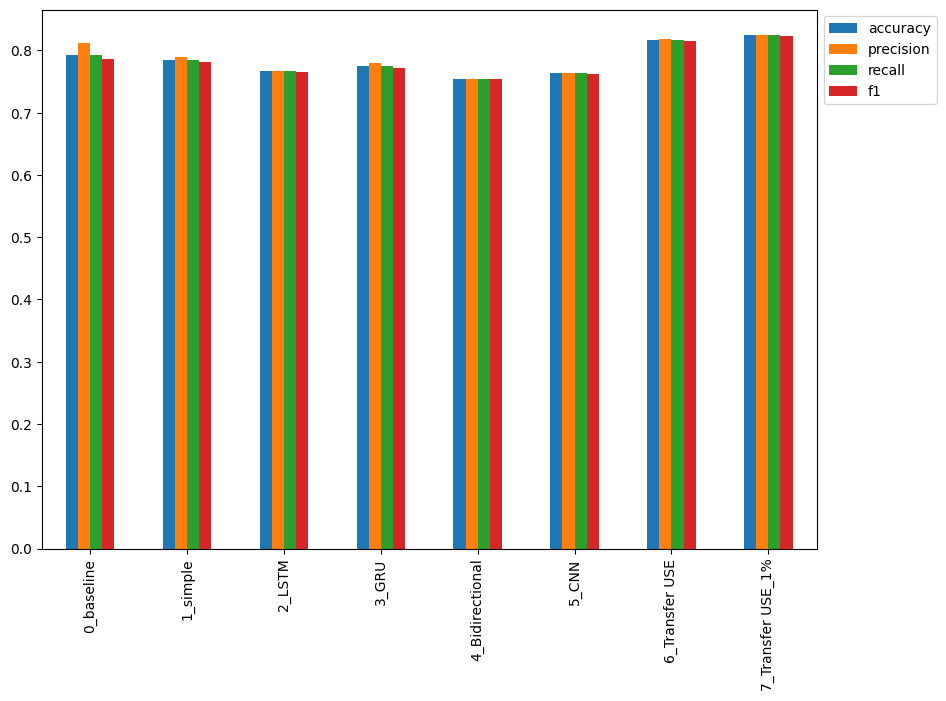

In [ ]:
Model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

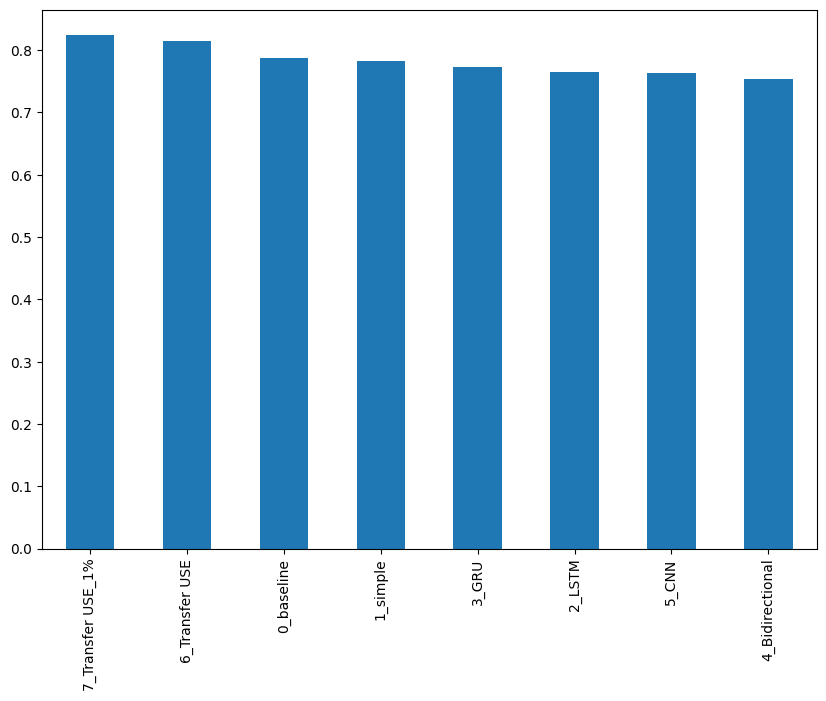

In [ ]:
# Sort model results by f1-score
Model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [ ]:
# from tensorflow.keras import layers
# inputs = layers.Input(shape=(1,),dtype=tf.string)
# x = text_vectorizer(inputs)
# x = embedding(x)
# x = layers.GlobalAveragePooling1D()(x)
# outputs = layers.Dense(1,activation="sigmoid")(x)
# Model_1 = tf.keras.Model(inputs,outputs)




Model_1 = tf.keras.Sequential([
    text_vectorizer,
    embedding,
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
Model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

Model_1.fit(train_sentences,
                     train_labels,
                     epochs = 5,
                     validation_data = (val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 11s 45ms/step - loss: 0.5094 - accuracy: 0.8173 - val_loss: 0.5006 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.2990 - accuracy: 0.9171 - val_loss: 0.4631 - val_accuracy: 0.7913
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2180 - accuracy: 0.9361 - val_loss: 0.4721 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1741 - accuracy: 0.9524 - val_loss: 0.4961 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1456 - accuracy: 0.9580 - val_loss: 0.5246 - val_accuracy: 0.7822


In [ ]:
# from tensorflow.keras import layers
# inputs = layers.Input(shape=(1,),dtype=tf.string)
# x = text_vectorizer(inputs)
# x = embedding(x)
# x = layers.LSTM(64,return_sequences = True)(x)
# x = layers.LSTM(64)(x)
# x = layers.Dense(64,activation="relu")(x)
# outputs = layers.Dense(1,activation="sigmoid")(x)
# Model_2 = tf.keras.Model(inputs,outputs)



Model_2 = tf.keras.Sequential([
    text_vectorizer,
    embedding,
    tf.keras.layers.LSTM(64,return_sequences = True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
Model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
Model_2.fit(train_sentences,
            train_labels,
            epochs = 5,
            validation_data = (val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 29s 98ms/step - loss: 0.1051 - accuracy: 0.9651 - val_loss: 0.9320 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0480 - accuracy: 0.9781 - val_loss: 1.0613 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0456 - accuracy: 0.9794 - val_loss: 1.3892 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0399 - accuracy: 0.9813 - val_loss: 1.2921 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0431 - accuracy: 0.9803 - val_loss: 1.2966 - val_accuracy: 0.7717


In [ ]:
# inputs = layers.Input(shape = (1,), dtype = tf.string)
# x = embedding(text_vectorizer(inputs))
# x = layers.Conv1D(filters = 64,
#                   kernel_size = 5,
#                   activation = "relu",
#                   padding = "valid")(x)
# x = layers.GlobalMaxPool1D()(x)
# outputs = layers.Dense(1,activation = "sigmoid")(x)
# Model_5 = tf.keras.Model(inputs,outputs)

# Model_5.compile(loss = "binary_crossentropy",
#                 optimizer = tf.keras.optimizers.Adam(),
#                 metrics = ["accuracy"])


Model_5 = tf.keras.Sequential([
    text_vectorizer,
    embedding,
    tf.keras.layers.Conv1D(filters = 64,
                           kernel_size = 5,
                           activation = "relu",
                           padding = "valid"),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

Model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

Model_5.fit(train_sentences,
            train_labels,
            epochs = 5,
            validation_data = (val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 12s 50ms/step - loss: 0.1322 - accuracy: 0.9527 - val_loss: 0.9073 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0760 - accuracy: 0.9699 - val_loss: 1.0804 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0610 - accuracy: 0.9740 - val_loss: 1.2865 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0540 - accuracy: 0.9766 - val_loss: 1.3417 - val_accuracy: 0.7612
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0487 - accuracy: 0.9781 - val_loss: 1.4698 - val_accuracy: 0.7677


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([("Tfidf",TfidfVectorizer()),
                     ("clf",MultinomialNB())])

model_0.fit(train_sentences_10_percent,train_labels_10_percent)

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
base_line_score = model_0.score(val_sentences,val_labels)
base_line_score*100

70.20997375328083

In [ ]:
import tensorflow_hub as hub
sentence_encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                  input_shape=[],
                                  trainable = True,
                                  dtype = tf.string)
# for l in sentence_encoder.layers[:-10]:
#   l.trainable = False


# print(len(sentence_encoder.weights))

Model_6 = tf.keras.Sequential([
    sentence_encoder,
    # tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


Model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

Model_6.fit(train_sentences,train_labels,epochs = 5,validation_data = (val_sentences,val_labels))

# inputs = tf.keras.layers.Input(shape = (1,),dtype = tf.string)
# sentence_encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
#                                   input_shape = [],
#                                   trainable = False,
#                                   dtype = tf.string)


# sentence_encoder.trainable = True



# keras_model = sentence_encoder._layer
# layer_1 = keras_model[0]

# layer_1
# sentence_encoder.layer
# sentence_encoder.layers

Epoch 1/5
215/215 [==============================] - 172s 645ms/step - loss: 0.4548 - accuracy: 0.7968 - val_loss: 0.4052 - val_accuracy: 0.8373
Epoch 2/5
215/215 [==============================] - 35s 164ms/step - loss: 0.2392 - accuracy: 0.9072 - val_loss: 0.4247 - val_accuracy: 0.8268
Epoch 3/5
215/215 [==============================] - 27s 126ms/step - loss: 0.0792 - accuracy: 0.9753 - val_loss: 0.5789 - val_accuracy: 0.7992
Epoch 4/5
215/215 [==============================] - 26s 121ms/step - loss: 0.0429 - accuracy: 0.9841 - val_loss: 0.5936 - val_accuracy: 0.7966
Epoch 5/5
215/215 [==============================] - 26s 123ms/step - loss: 0.0262 - accuracy: 0.9885 - val_loss: 0.6888 - val_accuracy: 0.8097
